**Import required models**

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler




**Load the Dataset**

In [51]:
# Load the dataset
data = pd.read_csv('earthquakes.csv')

# Display the first few rows
print(data.describe())
print(data.columns)



         magnitude          time       updated           felt          cdi  \
count  1137.000000  1.137000e+03  1.137000e+03    1137.000000  1137.000000   
mean      4.856675  1.712109e+12  1.716593e+12     414.408091     2.925242   
std       1.047840  1.143033e+10  9.671955e+09    5746.971362     2.562707   
min       3.000000  1.687542e+12  1.693083e+12       0.000000     0.000000   
25%       3.800000  1.701663e+12  1.707609e+12       0.000000     0.000000   
50%       5.300000  1.713810e+12  1.719958e+12       2.000000     3.000000   
75%       5.600000  1.722885e+12  1.725384e+12      24.000000     5.000000   
max       7.600000  1.726661e+12  1.726672e+12  183786.000000     9.000000   

               mmi      tsunami          sig          nst         dmin  \
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000   
mean      4.320141     0.059807   432.698329   115.094107     1.342604   
std       1.453949     0.237232   256.177844    91.877870     1.704364   
m

**Data Visualization**

1.Correlation Heatmap

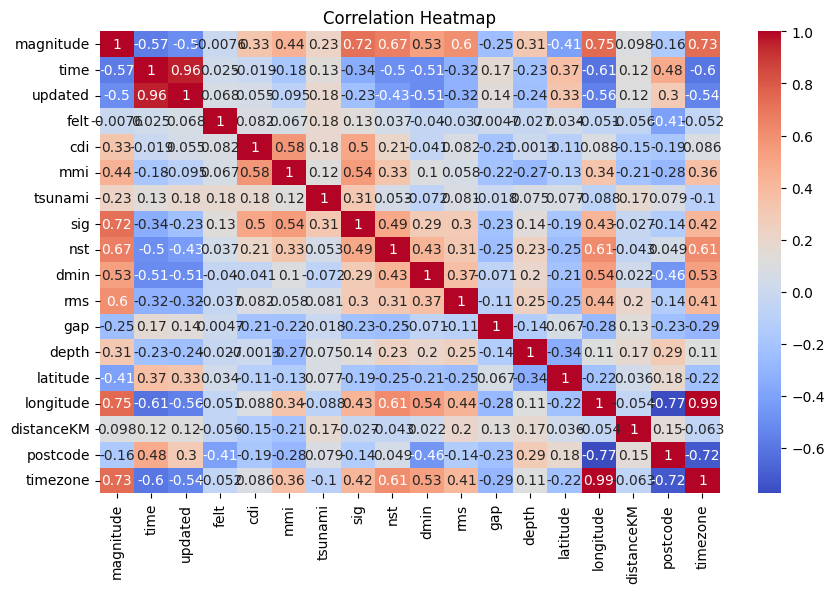

In [42]:
# Correlation matrix
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


2.Distribution of target variable

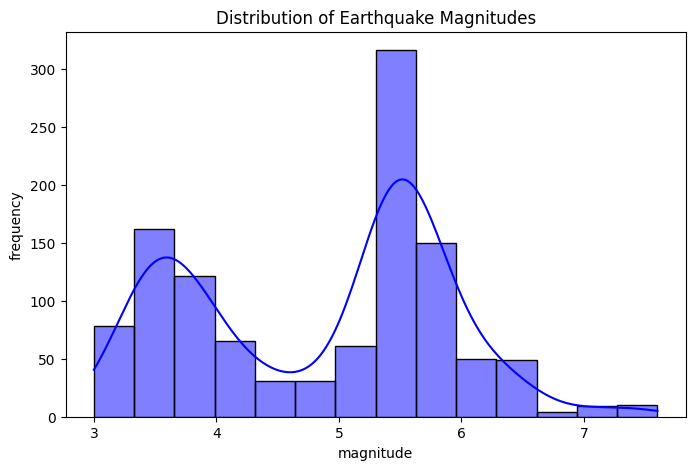

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(data['magnitude'], kde=True, color='blue')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("magnitude")
plt.ylabel("frequency")
plt.show()


3.Scatter Plot of Two Features (e.g., 'Depth' vs 'Magnitude')

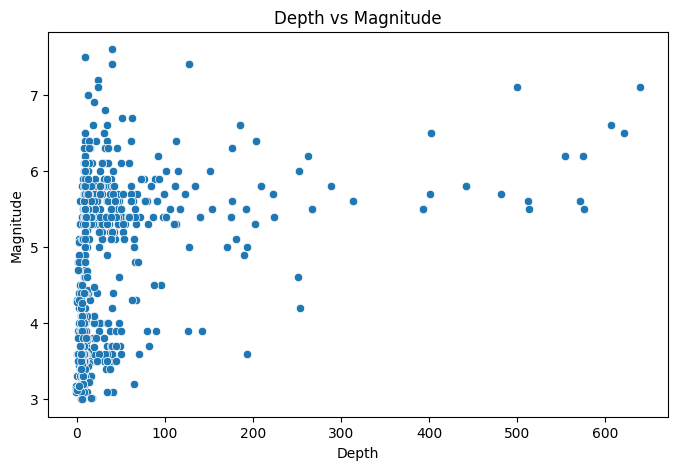

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['depth'], y=data['magnitude'])
plt.title("Depth vs Magnitude")
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()


<ipython-input-45-3fd655e28b13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')


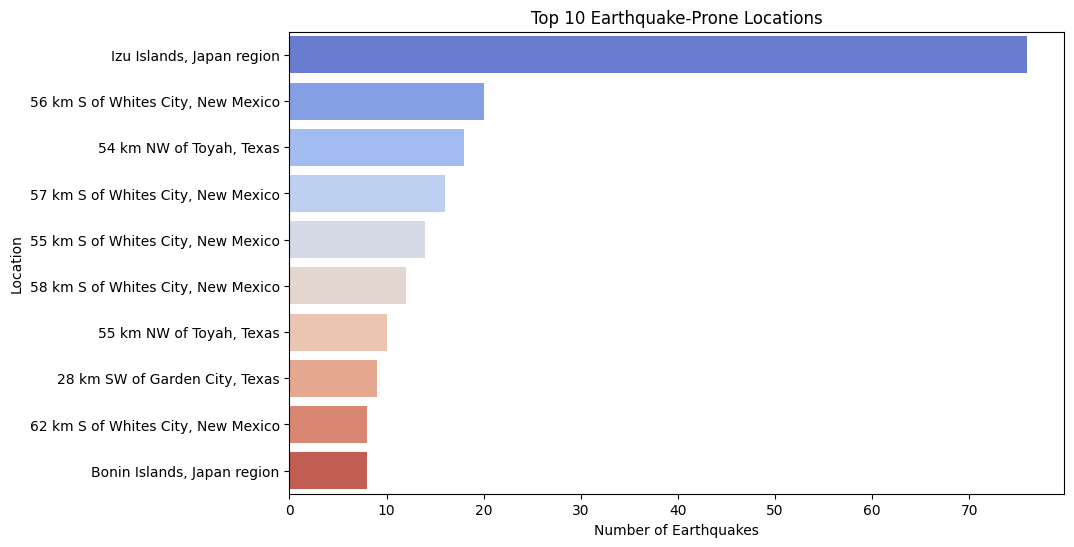

In [45]:
# Top 10 earthquake-prone locations by frequency
top_locations = data['place'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')
plt.title('Top 10 Earthquake-Prone Locations')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location')
plt.show()

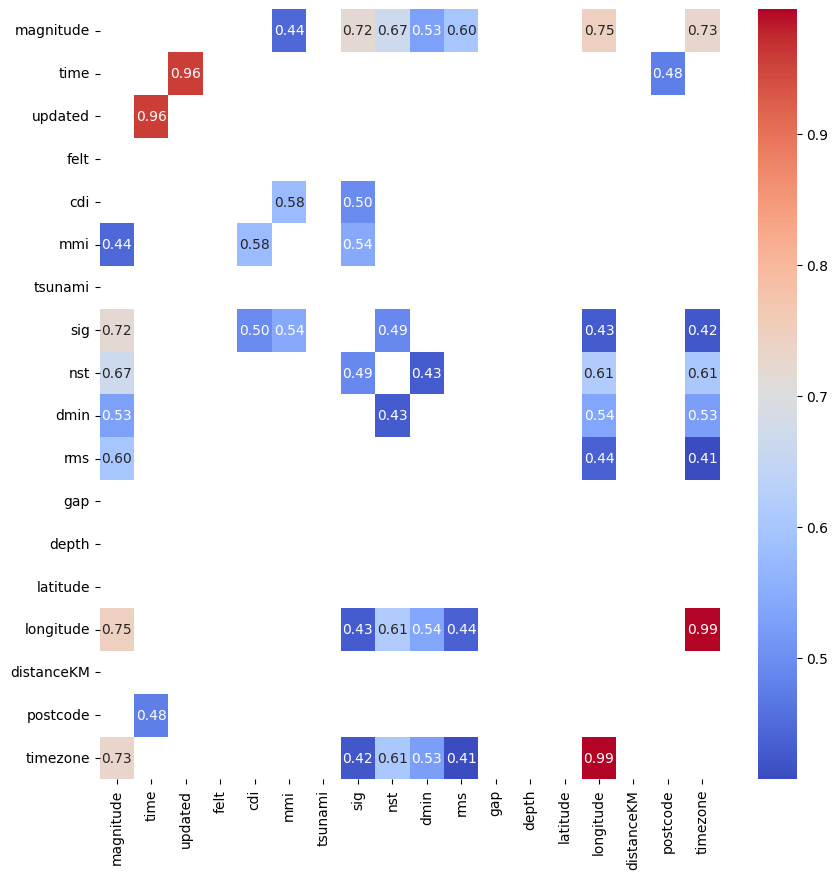

In [46]:
# get correlation matrix
corr_matrx = data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
# Applying Threshold bases mask
threshold = 0.4
mask = (corr_matrx < threshold) & (corr_matrx != 1)
sns.heatmap(corr_matrx[corr_matrx != 1],annot=True,fmt='0.2f',cmap='coolwarm',mask=mask)
plt.show()

In [47]:
#threshold uding mean
print("Mean of Green Alert Magnitude  = ",data[data.alert == 'green']['magnitude'].mean())
print("Mean of Red Alert Magnitude  = ",data[data.alert == 'red']['magnitude'].mean())
print("Mean of Orange Alert Magnitude  = ",data[data.alert == 'orange']['magnitude'].mean())
print("Mean of Yellow Alert Magnitude  = ",data[data.alert == 'yellow']['magnitude'].mean())

Mean of Green Alert Magnitude  =  5.388537271448664
Mean of Red Alert Magnitude  =  6.888888888888889
Mean of Orange Alert Magnitude  =  6.3
Mean of Yellow Alert Magnitude  =  6.273684210526317


In [48]:
# Data preprocessing
# 1. Handle missing values
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].mean())

# 2. Convert 'alert' and 'magType' to numerical
data = pd.get_dummies(data, columns=['alert', 'magType'], drop_first=True)

# 3. Select features (X) and target (y)
# Exclude 'type' column or any other columns containing strings
features = ['depth', 'latitude', 'longitude', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']
# Remove features not in dataset
features = [col for col in features if col in data.columns]
X = data[features]
y = data['magnitude']

# 4. Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (Regression Metrics)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# For Accuracy and Confusion Matrix
threshold = 5.0
y_test_class = (y_test >= threshold).astype(int)
y_pred_class = (y_pred >= threshold).astype(int)

# Calculate Accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy}")

# Calculate and Display Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(cm)

RMSE: 0.2665577587914667
MSE: 0.07105303877192974
MAE: 0.15059122807017541
R-squared: 0.9341574941340103
Accuracy: 0.9736842105263158
Confusion Matrix:
[[102   1]
 [  5 120]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       103
           1       0.99      0.96      0.98       125

    accuracy                           0.97       228
   macro avg       0.97      0.98      0.97       228
weighted avg       0.97      0.97      0.97       228



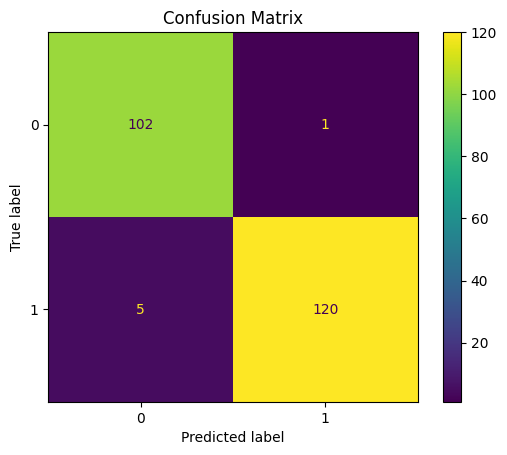

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
# Classification Report
class_report = classification_report(y_test_class, y_pred_class)
print("Classification Report:\n", class_report)
# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

**Visualize predictions**

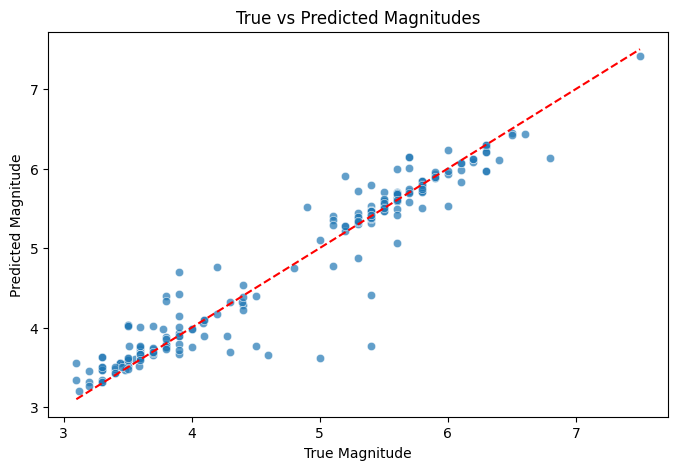

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title("True vs Predicted Magnitudes")
plt.xlabel("True Magnitude")
plt.ylabel("Predicted Magnitude")
plt.show()
